In [1]:
import tensorflow as tf

In [2]:
pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow_datasets
mnist = tensorflow_datasets.load('mnist')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

In [5]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) =mnist.load_data()

In [6]:
print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize Examples

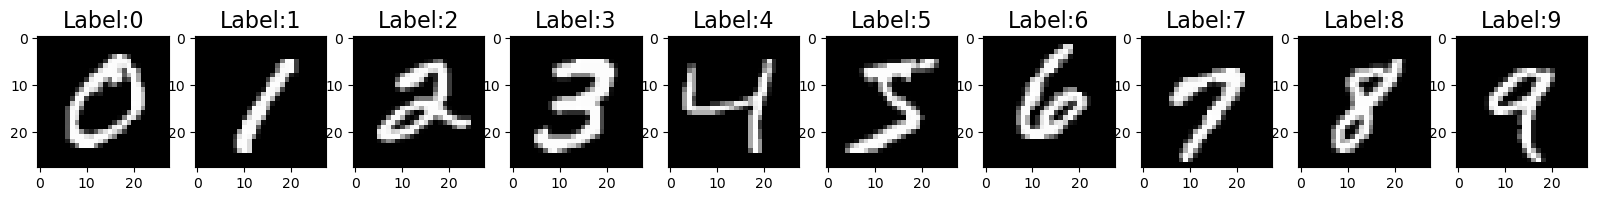

In [7]:
num_classes = 10

f, ax = plt.subplots(1, num_classes, figsize=(20,20))


for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title('Label:{}'.format(i), fontsize=16)

In [8]:
y_train = keras.utils.to_categorical(y_train,num_classes)

y_test = keras.utils.to_categorical(y_test,num_classes)

In [9]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# PREPARE DATA

In [10]:
#Normalize Data

x_train = x_train /255.0
x_test = x_test /255.0

In [11]:
#RESHAPE DATA

x_train = x_train.reshape(x_train.shape[0], -1)

x_test = x_test.reshape(x_test.shape[0], -1)

print(x_train.shape)

(60000, 784)


# CREATE MODEL TO CONNECT TO NEURAL NETWORK

In [15]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation = 'relu'))

model.add(Dense(units=128, activation ='relu'))

model.add(Dropout(0.25))

model.add(Dense(units=10, activation = 'softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# TRAIN

In [17]:
batch_size = 512

epochs =20



model.fit(x=x_train,y=y_train, batch_size = batch_size, epochs = epochs) 


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9872 - loss: 0.0435
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9877 - loss: 0.0394 
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9902 - loss: 0.0331
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9909 - loss: 0.0292
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9920 - loss: 0.0282
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9927 - loss: 0.0240
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9922 - loss: 0.0242
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9941 - loss: 0.0196
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9950 - loss: 0.0174
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9944 - loss: 0.0196
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9961 - loss: 0.0135
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9

# EVALUATE

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss: {}, Test Accuracy: {}'.format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9763 - loss: 0.0983
Test Loss: 0.08213864266872406, Test Accuracy: 0.9786999821662903


In [19]:
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)


print(y_pred)

print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[7.0787383e-11 7.1527843e-08 4.1719996e-08 ... 9.9999940e-01
  2.1982740e-09 1.7188857e-07]
 [1.1763771e-11 3.7997452e-08 1.0000000e+00 ... 1.8196009e-12
  7.3872430e-10 5.5881923e-18]
 [1.2969327e-09 9.9999487e-01 7.0278368e-08 ... 1.1954612e-06
  8.3685137e-07 6.9907213e-09]
 ...
 [1.7221195e-16 1.5491103e-12 4.3238204e-20 ... 1.8269013e-11
  1.7945370e-12 1.3379189e-10]
 [2.0272059e-13 1.4824456e-13 6.4011360e-16 ... 1.3509058e-12
  5.8537584e-08 2.8076297e-16]
 [1.3981713e-11 3.1566078e-15 1.6816550e-13 ... 1.1955416e-17
  1.7153974e-14 7.3953950e-17]]
[7 2 1 ... 4 5 6]


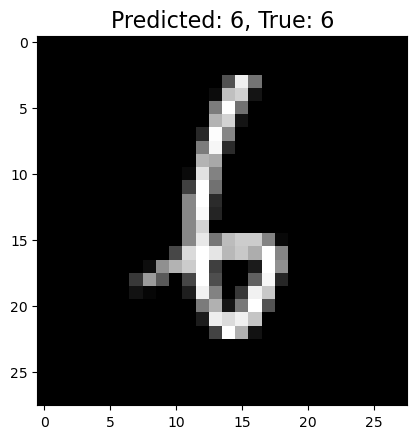

In [20]:
#SINGLE EXAMPLES

random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]


plt.title('Predicted: {}, True: {}'.format(y_sample_pred_class, y_sample_true), fontsize=16)

plt.imshow(x_sample.reshape(28,28), cmap='gray')

# CONFUSION MATRIX

Text(0.5, 1.0, 'Confusion Matrix')

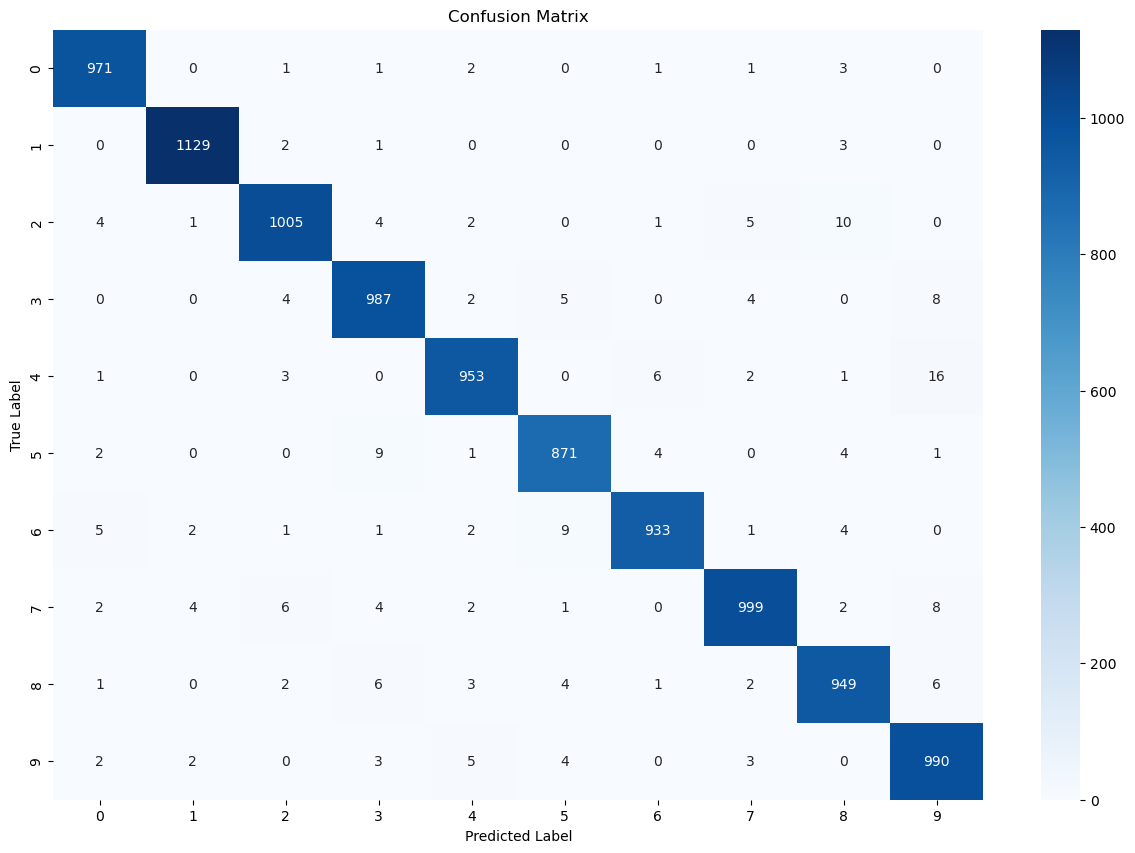

In [23]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)


#PLOT

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(confusion_mtx, annot=True, fmt = 'd',ax=ax, cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# INVESTIGATE SOME ERROR

In [24]:
errors = (y_pred_classes - y_true !=0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

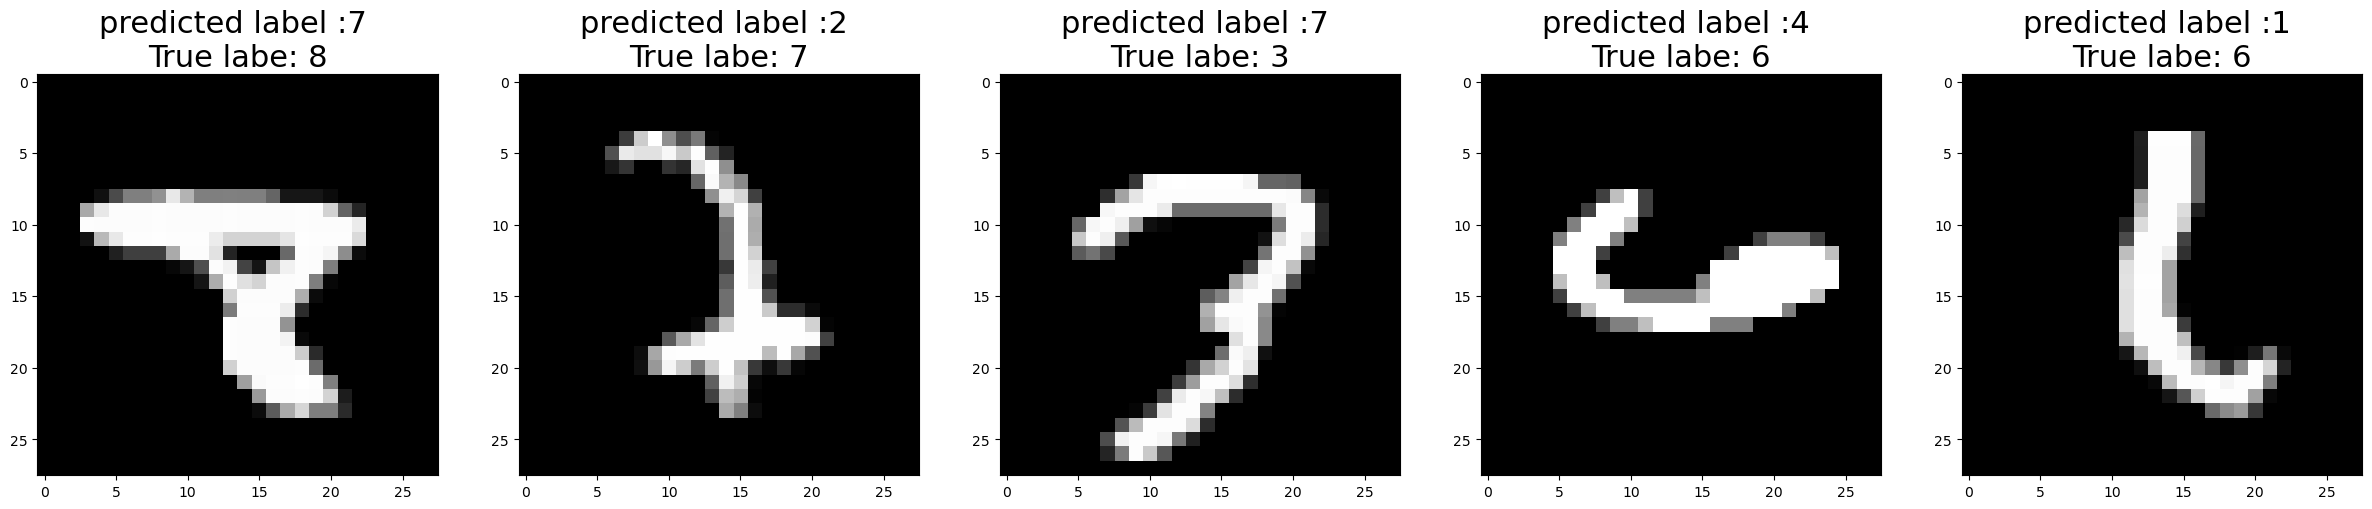

In [29]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)

true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability- true_probability_errors



#Get list of indices of sorted differences

sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] #5 last ones


#show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize =( 30,30))


for i in range(0, num):
    idx = top_idx_diff_errors[i]
    sample = x_test_errors[idx].reshape(28,28)
    y_t = y_true_errors[idx]
    y_p = y_pred_classes_errors[idx]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title('predicted label :{} \nTrue labe: {}'.format(y_p, y_t), fontsize=22)